In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load the dataset
df = sns.load_dataset('penguins')
print("Original dataset shape:", df.shape)


Original dataset shape: (344, 7)


In [3]:
# 2. Preprocessing
# Drop missing values
df.dropna(inplace=True)

In [4]:
# Encode categorical variables
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])  # target variable
df['sex'] = le.fit_transform(df['sex'])
df['island'] = le.fit_transform(df['island'])


In [5]:
# Separate features and target
X = df.drop('species', axis=1)
y = df['species']


In [6]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# 3. Outlier Detection and Removal using Z-score
from scipy.stats import zscore
z_scores = np.abs(zscore(X_scaled))
threshold = 3
no_outliers = (z_scores < threshold).all(axis=1)

In [8]:
# Filter the data
X_clean = X_scaled[no_outliers]
y_clean = y[no_outliers]
print("After outlier removal:", X_clean.shape)

After outlier removal: (333, 6)


In [9]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [10]:
# 5. Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [11]:

# 6. Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      Biscoe       1.00      1.00      1.00        31
       Dream       1.00      1.00      1.00        13
   Torgersen       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Accuracy Score: 1.0


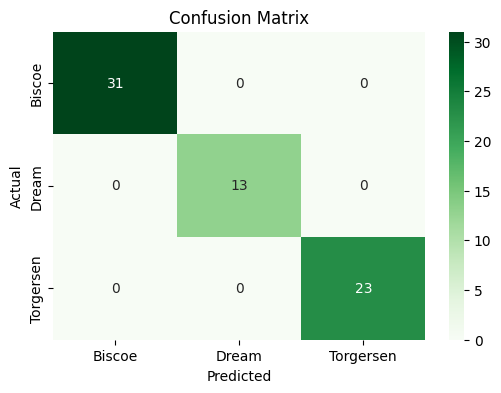

In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

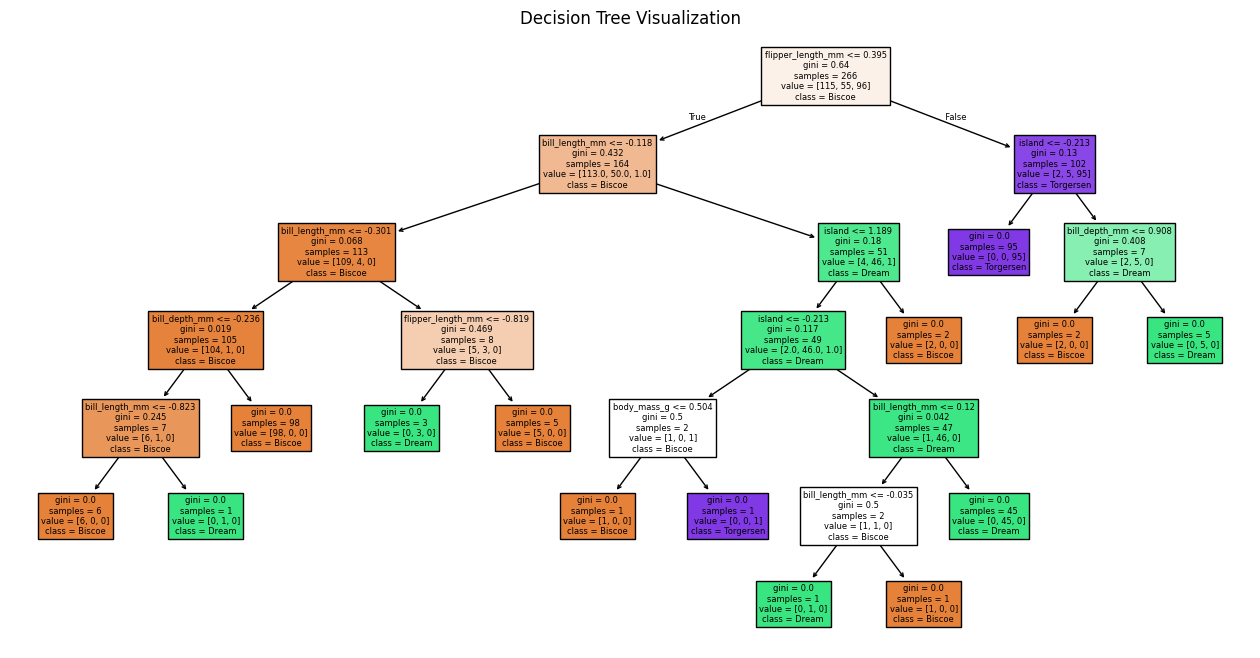

In [13]:
# 7. Optional: Visualize the Decision Tree
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=df.drop('species', axis=1).columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()